## This Notebook is the code to accompany article Many Ways to Visualize Your Data via Animation
Article: https://towardsdatascience.com/many-ways-to-visualize-your-data-via-animation-f55173933fd3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc

In [18]:
#Set the figure and figure size
rc('animation', html='html5')
fig1 = plt.figure(figsize = (16,10))

<Figure size 1152x720 with 0 Axes>

# Create Simple Animation using Matplotlib Animation

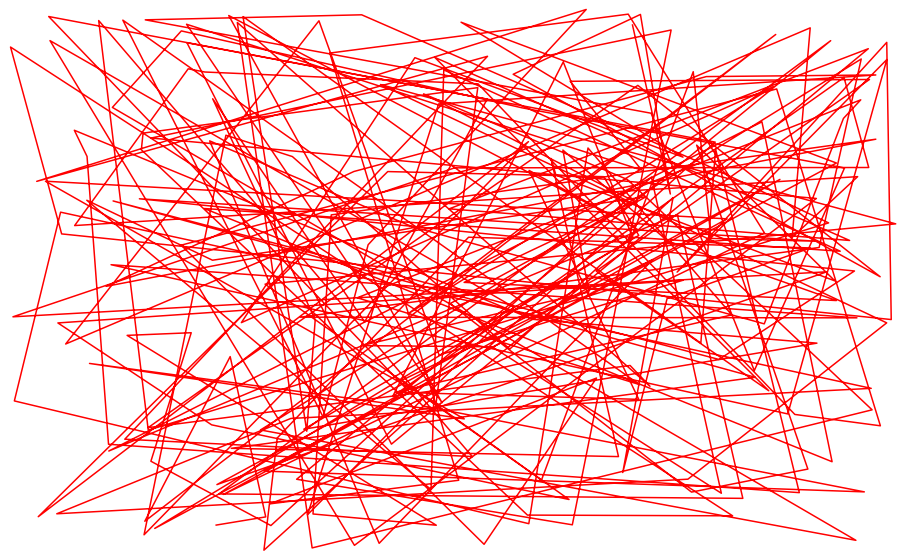

In [3]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

rc('animation', html='html5')
fig1 = plt.figure(figsize = (16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 250)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
# plt.title('test')
plt.axis('off')
line_ani = animation.FuncAnimation(fig1, update_line, 250, fargs=(data, l),
                                   interval=100, blit=True)

line_ani
# To save the animation, use the command: 
line_ani.save('lines.mp4')

In [4]:
line_ani

# Using Real Dataset

In [3]:
from yahoo_historical import Fetcher

In [4]:
BBCA = Fetcher('BBCA.JK', [2012,1,1], interval = '1d').getHistorical()

In [24]:
BBCA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,8000.0,8000.0,7950.0,8000.0,7099.381348,1574000
1,2012-01-03,8100.0,8100.0,7950.0,8100.0,7188.124023,5555000
2,2012-01-04,8100.0,8150.0,8000.0,8100.0,7188.124023,17449000
3,2012-01-05,8050.0,8150.0,8050.0,8050.0,7143.752930,11439500
4,2012-01-06,8000.0,8050.0,7950.0,8000.0,7099.381348,5438000


In [25]:
BBCA.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
BBCA['Date'] = pd.to_datetime(BBCA['Date'])

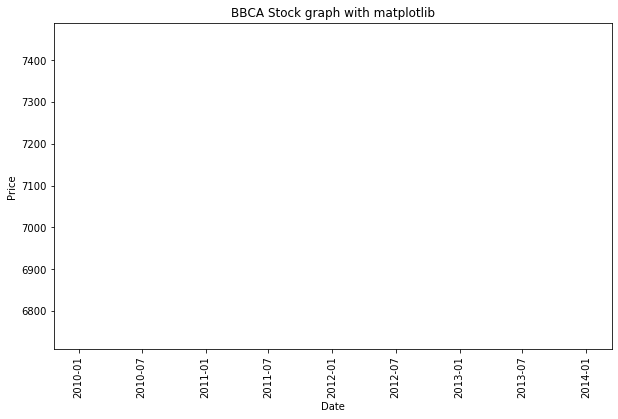

In [21]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure(figsize = (10,6))

#creating a subplot 
ax1 = fig.add_subplot(1,1,1)
date = []
adjclose = []


def animate(i):
    date.append(BBCA['Date'].loc[i])
    adjclose.append(BBCA['Adj Close'].loc[i])

    ax1.clear()
    
    ax1.plot(date, adjclose)
    ax1.tick_params(axis = 'x', labelrotation = 90)
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.set_title('BBCA Stock graph with matplotlib')
    
        
ani = animation.FuncAnimation(fig, animate, frames = len(BBCA), interval = 20) 
plt.show()

In [12]:
from matplotlib import rc
rc('animation', html='html5')

# ani

In [54]:
ani.save('bbca_stock.mp4')

# Using Celluloid

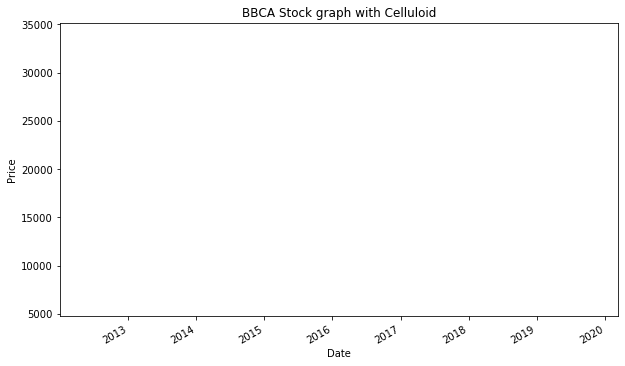

In [56]:
from celluloid import Camera

tes = BBCA.set_index('Date')

fig = plt.figure(figsize = (10,6))

camera = Camera(fig)
date = []
adjclose = []

for i in range(49,len(BBCA),50):
    tes['Adj Close'][0:i].plot(color = 'blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('BBCA Stock graph with Celluloid')
    camera.snap()
    
    
animation = camera.animate()



# Using Plotly

In [17]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()